### 1. Use the iris database to answer the following quesitons:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from env import user, password, host, get_db_url

#### * What does the distribution of petal lengths look like?

In [2]:
iris_query = """SELECT *
                    FROM measurements
                        JOIN species USING(species_id);"""
iris_url = get_db_url(user, password, host, "iris_db")

iris = pd.read_sql(iris_query, iris_url)
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


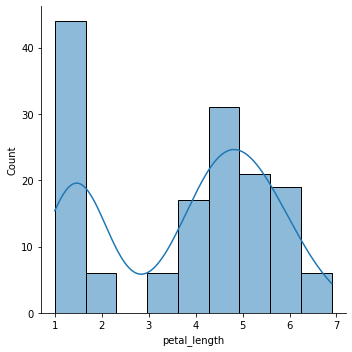

In [3]:
sns.displot(iris.petal_length, kde = True)

#### * Is there a correlation between petal length and petal width?

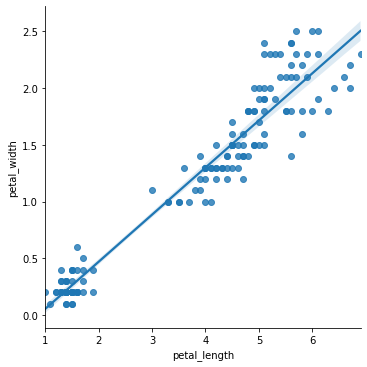

In [4]:
sns.lmplot(x = "petal_length", y = "petal_width", data = iris)
# The relationship between petal length and width seems linear

#### * Would it be reasonable to predict species based on sepal width and sepal length?

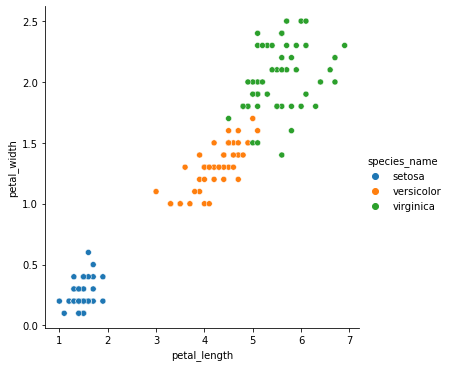

In [5]:
sns.relplot(x = "petal_length", y = "petal_width", hue = "species_name", data = iris)
# Yes because each species of flower generally falls within a certain range of petal legnth and since petal width has a linear relationship with petal length, the petal lengths of the different species also fall into distinct ranges.

#### * Which features would be best used to predict species?

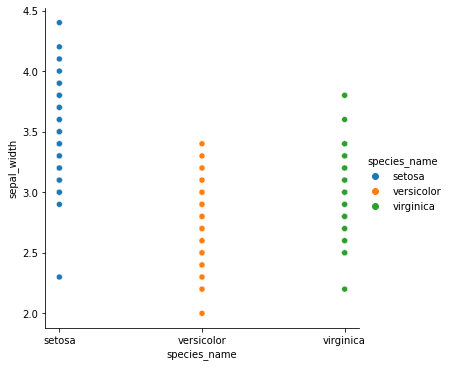

In [6]:
sns.relplot(x = "species_name", y = "sepal_width", hue = "species_name", data = iris)

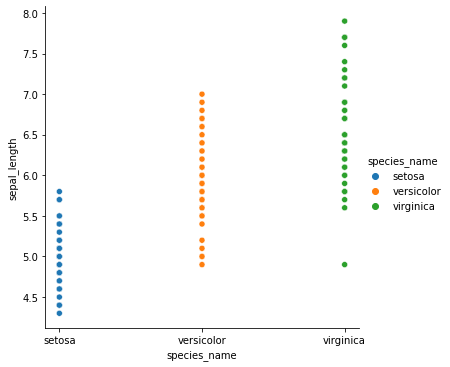

In [7]:
sns.relplot(x = "species_name", y = "sepal_length", hue = "species_name", data = iris)

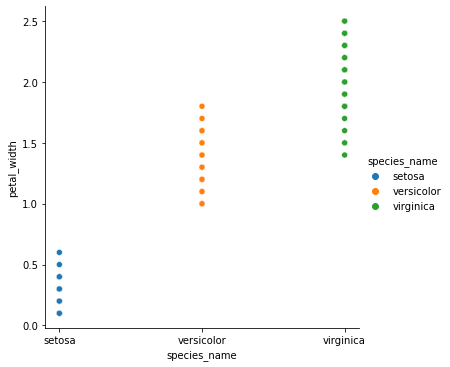

In [8]:
sns.relplot(x = "species_name", y = "petal_width", hue = "species_name", data = iris)

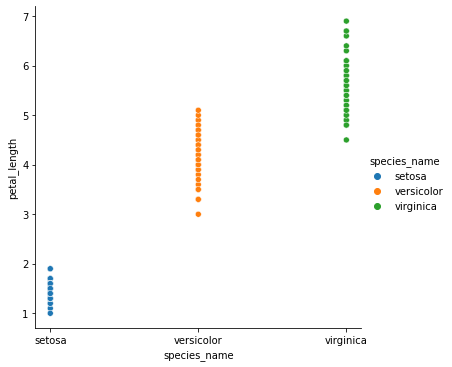

In [9]:
sns.relplot(x = "species_name", y = "petal_length", hue = "species_name", data = iris)

In [10]:
# Petal length and petal width are the best features to predict species because the range of values for the features of each species overlap the least and have more distinct ranges.

### 2. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [11]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [12]:
anscombe.groupby("dataset").agg(["min", "median", "mean", "max"])

x                       y                        
         min median mean   max   min median      mean    max
dataset                                                     
I        4.0    9.0  9.0  14.0  4.26   7.58  7.500909  10.84
II       4.0    9.0  9.0  14.0  3.10   8.14  7.500909   9.26
III      4.0    9.0  9.0  14.0  5.39   7.11  7.500000  12.74
IV       8.0    8.0  9.0  19.0  5.25   7.04  7.500909  12.50

In [13]:
# The min, median, mean, and max x values for datasets 1,2,3 are all the same. 

#### * Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

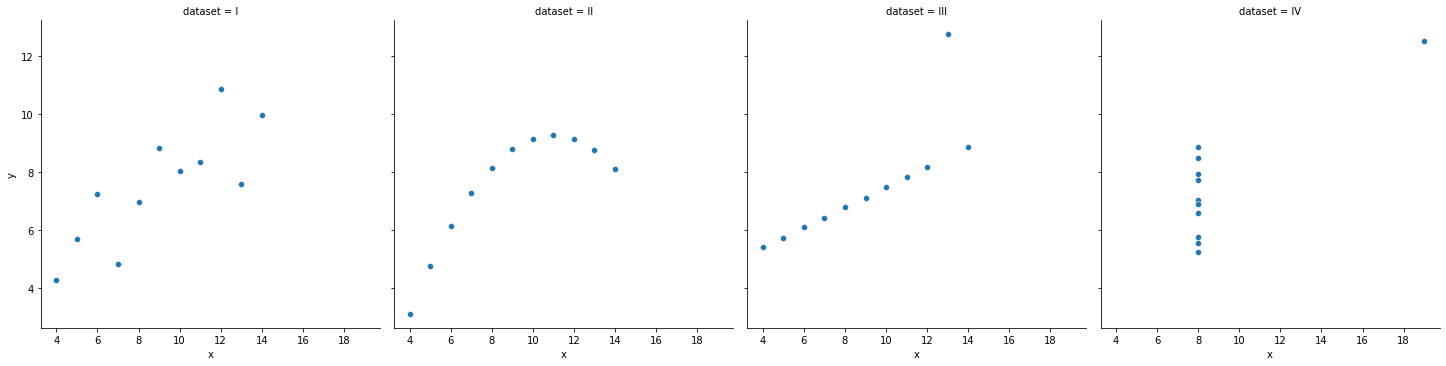

In [14]:
sns.relplot(x = "x", y = "y", col = "dataset", data = anscombe)

### 3. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [15]:
data("InsectSprays", show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [16]:
insect_sprays = data("InsectSprays")
insect_sprays.sample(10)

,count,spray
29,3,C
66,16,F
40,6,D
59,6,E
56,1,E
64,22,F
16,11,B
2,7,A
71,24,F
57,3,E


<AxesSubplot:xlabel='spray', ylabel='count'>

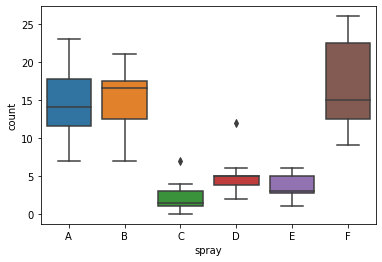

In [17]:
sns.boxplot(data = insect_sprays, y = "count", x = "spray")

### 4. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [18]:
data("swiss", show_doc = True)
swiss = data("swiss")
swiss.sample(10)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Avenches,68.9,60.7,19,12,4.43,22.7
Neuveville,76.9,43.5,17,15,5.16,20.6
La Chauxdfnd,65.7,7.7,29,11,13.79,20.5
Oron,72.5,71.2,12,1,2.40,21.0
Monthey,79.4,64.9,7,3,98.22,20.2
Boudry,70.4,38.4,26,12,5.62,20.3
Vevey,58.3,26.8,25,19,18.46,20.9
Lausanne,55.7,19.4,26,28,12.11,20.2
Echallens,68.3,72.6,18,2,24.20,21.2
La Vallee,54.3,15.2,31,20,2.15,10.8


#### * Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [19]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


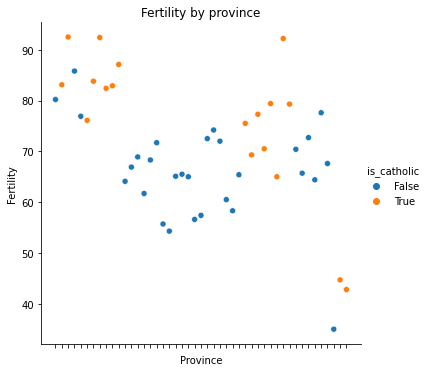

In [33]:
sns.relplot(x = swiss.index, y = "Fertility", hue = "is_catholic", data = swiss).set(xticklabels = [], xlabel = "Province", title = "Fertility by province")
# There doesn't seem to be a relationship between fertility and whether or not a provice is Catholic.

#### * What measure correlates most strongly with fertility?

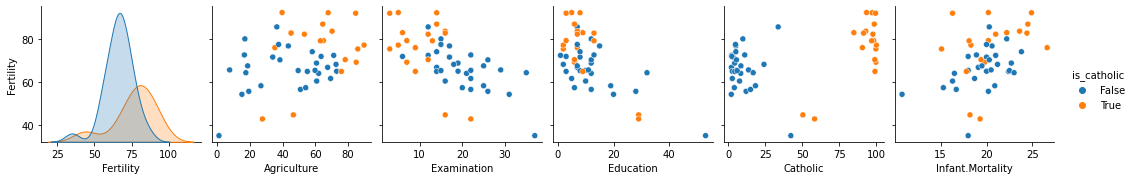

In [51]:
sns.pairplot(swiss, y_vars = ["Fertility"], hue = "is_catholic")
# Examination seems to correlate most strongly to fertility

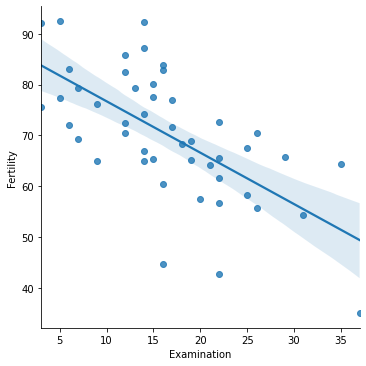

In [54]:
sns.lmplot(x = "Examination", y = "Fertility", ci = 95, data = swiss)

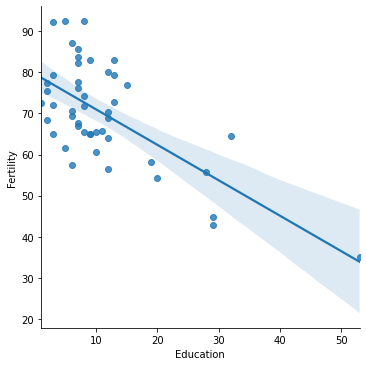

In [55]:
sns.lmplot(x = "Education", y = "Fertility", ci = 95, data = swiss)

### 5. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [62]:
chipotle_query = """SELECT *
                        FROM orders;"""

chipotle_url = get_db_url(user, password, host, "chipotle")
chipotle = pd.read_sql(chipotle_query, chipotle_url)
chipotle.sample(14)

,id,order_id,quantity,item_name,choice_description,item_price
2055,2056,828,1,Chips and Fresh Tomato Salsa,nan,$2.39
4505,4506,1791,1,Chips,nan,$2.15
1958,1959,791,1,Chips,nan,$2.15
872,873,360,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]",$8.75
3373,3374,1354,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream, Lettuce]]",$8.49
3738,3739,1493,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, L...",$11.75
3215,3216,1286,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Guacamole, Lettuce]]",$11.25
2760,2761,1096,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
3996,3997,1601,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Sour Cream, Guacamole, Let...",$11.25
3696,3697,1481,1,Barbacoa Burrito,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sour Cream, Lettuce]]",$9.25


In [63]:
chipotle['item_price'] = chipotle.item_price.str.replace("$", "").astype(float)
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


[Text(0, 0.5, 'Revenue ($)')]

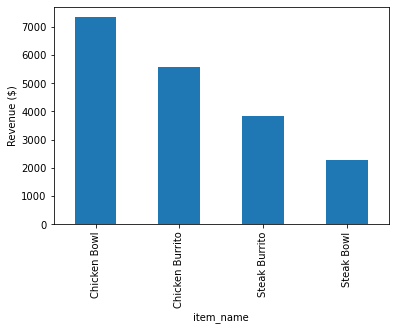

In [78]:
top_4 = chipotle.groupby("item_name").item_price.sum().nlargest(4, keep = "all")
top_4.plot.bar().set(ylabel = "Revenue ($)")

### 6. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [79]:
data("sleepstudy", show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [98]:
sleep = data("sleepstudy")
reaction_delta = sleep.groupby("Subject").Reaction.agg(["max", "min"])
reaction_delta['delta'] = reaction_delta['max'] - reaction_delta['min']
average_reaction_change = reaction_delta.delta.mean()

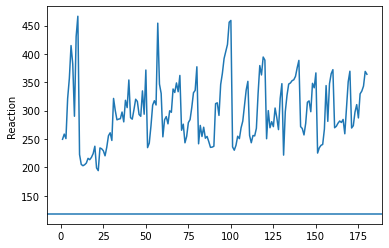

In [99]:
graph = sns.lineplot(x = sleep.index, y = "Reaction", data = sleep, err_style = None)
graph.axhline(average_reaction_change)